# Life Expectancy and GDP
## Introduction
The purpose of this project is to analyze data from the [World Health Organization](http://apps.who.int/gho/data/node.main.688) and the [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) in order to answer some key questions on GDP and life expectancy for six different countries.
The data will be prepared in order to create different kind of vizualizations that will help to address questions like the following:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

## Import modules
The modules that will be used in this project are `pandas`, `matplotlib` and `seaborn`.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data loading
The data from the **all_data.csv** file are loaded into a DataFrame. The first few rows of the DataFrame are printed for data inspection.

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Data inspection
Looking over the data of the `df`, one of the first things a person will notice is the long name of the life expectancy column compared to the other column names. For convenience, this column can be renamed using the `rename` function as `'Life expectancy'`.

In [3]:
df = df.rename({'Life expectancy at birth (years)':'Life expectancy'}, axis='columns')
print(df.head())

  Country  Year  Life expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


As fas as the data values are concerned, one can observe that GDP is measured in trillion dollars. Also, by printing the first few rows of the `df`, it's difficult to know the different nations the `'Country'` column contains or the different years that will be involved in the analysis.
So the next step is to `print` the unique values for the `'Country'` and `'Year'` column.

In [4]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


So, the data involves countries from North and South America, Europe, Asia and Africa continents, and the years for which the analysis will performed are from 2000 to 2015. Also, two of the countries, Mexico and Zimbabwe are developing countries and the rest are considered developed. This distinction may appear and justify differences in some visualizations that will be made during this project. 

## Life expectancy distribution
The next column that will be investigated is the `'Life expectancy'` column. Instead of looking over the data values in `df`, it is rather convenient to make a visualization of their distribution. `Seaborn`'s `violinplot()` function will be used to gain information about the data distribution.

Text(0.5, 1.0, 'Life Expectancy Distribution')

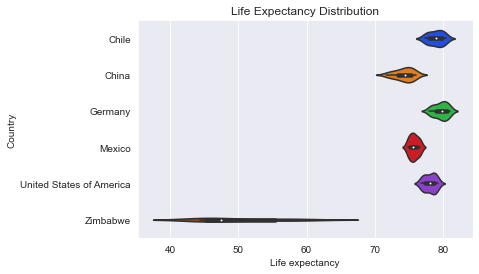

In [5]:
sns.set_style('darkgrid')
sns.violinplot(data=df, y='Country', x='Life expectancy', palette='bright')
plt.title('Life Expectancy Distribution')

The chart addresses one of the questions stated on the introduction:
- What is the distribution of that life expectancy?

Looking over the diagram above, one country stands out because of its wide range and generally smaller values. This country is Zimbabwe, having an interquartile range of ten years (45 to 55 years). For the rest of the countries, the distribution is a lot smaller with life expectancy ranging from 72 to 81 years. 
These results seem normal regarding the fact that Zimbabwe has a very low Human Development Index (HDI) according to [Human Development Reports](http://hdr.undp.org/en/data) compared to the other countries.

Unfortunately, from this kind of plot, we don't get much information about the life expectancy change over the years. So, the next step is to create some visualizations to evaluate the temporal change of the life expectancy data.

## Life expectancy over time
The values from the `'Life expectancy'` column of the `df` will be plotted along with the values from the `'Year'` column using `Seaborn`'s `lineplot()` function. The outcome of this visualization aims to answer the question:
-  Has life expectancy increased over time in the six nations?

Text(0.5, 1.0, 'Life expectancy over time')

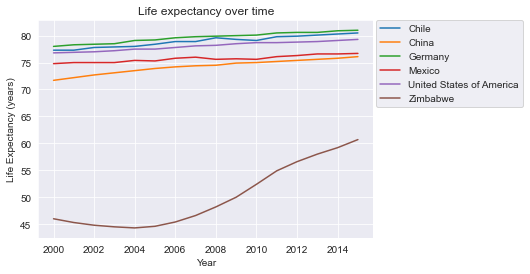

In [6]:
sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Country')
plt.ylabel('Life Expectancy (years)')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Life expectancy over time')

The plot above as the previous one, exhibits a perceptible difference between the life expectancy of Zimbabwe and the life expectancy of the other five nations. Nevertheless, instead of focusing on the distribution of the values, this visualization displays the change of the life expectancy values over fourteen years. 

The prominent characteristic of this graph is that all the trends are generally upward with a small rate of change, except for the trend of Zimbabwe. Life expectancy in Zimbabwe exhibits a small decrease after 2000 till 2004, and afterwards it changes radically from 45 to 60 years.

In Chile, Germany and United States of America, life expectancy is over 75 years in 2000 and follows a slight increase reaching 80 years after 2014. For Mexico and China, the trends are a little below compared to the previous countries, but the life expectancy is also high (over 70 years) and increasing over time reaching roughly 76 years.

The graph above gives us a lot of information about the temporal change of life expectancy for the six nations. However, plotting multiple lines in a graph may hide some details as the data share y-axis. For that reason, life expectancy will be plotted on separate axes for each country using the `FacetGrid` class of `Seaborn`.

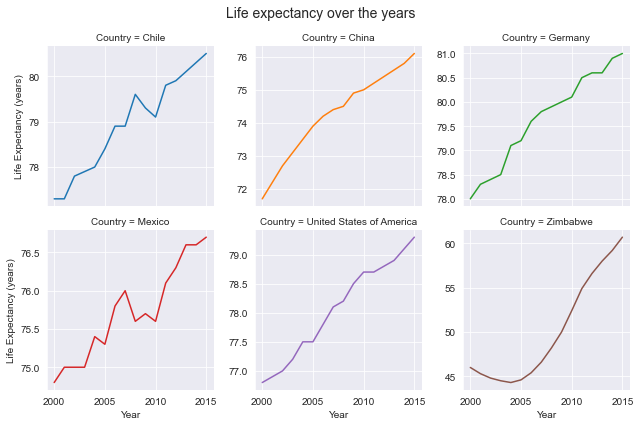

In [7]:
g = sns.FacetGrid(df, col='Country', hue='Country', col_wrap=3, sharey=False)
g.map(sns.lineplot,'Year','Life expectancy')
g.set_ylabels('Life Expectancy (years)')
g.fig.suptitle('Life expectancy over the years', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 1])

From the figure above it can be clearly seen that the life expectancy for all six nations has increased over the years. For China, Germany and the United States of America, life expectancy increases almost linearly. For Chile and Mexico, the trend exhibits some very small but sharp fluctuations especially between 2005 and 2010. Life expectancy in Zimbabwe generally transitions smoothly over the years with only a dip approximately in 2004. After 2004, the trend is upward covering a large change in life expectancy about 15 years.

Apart from the distribution and the temporal change of life expectancy, it is also important to aqcuire information about the average life expectancy for each of the involved nations.

## Average life expectancy
The mean is one of the most common statistic selected to help us understand a dataset. Finding and displaying the center of the data is often the first thing to do when performing data analysis. That is why one of the questions that will be answered in this project is the following:
- What is the average life expectancy in these nations?

To answer this question, `Seaborn`'s bar plot will be used on `'Life expectancy'` and `'Country'` columns.

Text(0.5, 1.0, 'Average Life Expectancy')

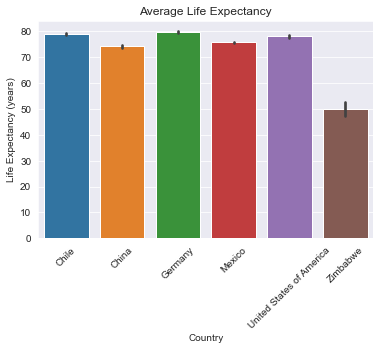

In [8]:
ax = sns.barplot(data=df, x='Country', y='Life expectancy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Life Expectancy (years)')
ax.set_title('Average Life Expectancy')

Observing the bar plot above, it is evident that Germany has the highest average life expectancy about 80 years. Once more, the big difference in Zimbabwe's data compared to the rest of the countries is conspicuous. The average value of life expectancy in Zimbabwe is 50 years, whereas for the other nations the average value varies in the interval of 70 to 80 years as expected from the previous graphs.

## GDP distribution
Gross Domestic Product or GDP is another measure that needs to be explored in this project. The investigation of this variable can begin by making a visualization of its distribution.
Instead of using `Seaborn`'s `violinplot()` function as before, another common function of this module, the `boxplot()` will be used to reveal how the values in the `'GDP'` column are spread out.  

Text(0.5, 1.0, 'GDP Distribution')

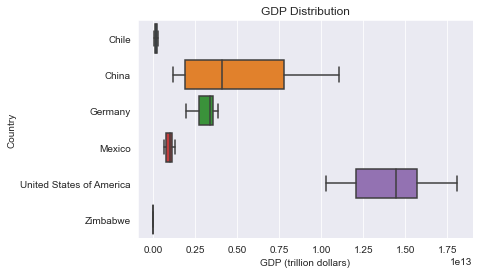

In [9]:
ax = sns.boxplot(data=df, y='Country', x='GDP')
ax.set_xlabel('GDP (trillion dollars)')
ax.set_title('GDP Distribution')

In Chile and Zimbabwe, the vertical lines in the graph indicate that the data points are concentrated along the lines because their values do not vary. In China, GDP has the widest distribution compared to the other countries with most of the values falling between 0.2 and 0.8 trillion dollars, whereas USA seem to have the highest GDP values, most of which are over 1.2 trillion dollars.

## GDP over time
The temporal change of GDP will be visualized complementing the previous graph in order to gain more information about the change of the data and to be able to answer the following key question:
- Has GDP increased over time in the six nations?

Text(0.5, 1.0, 'GDP over time')

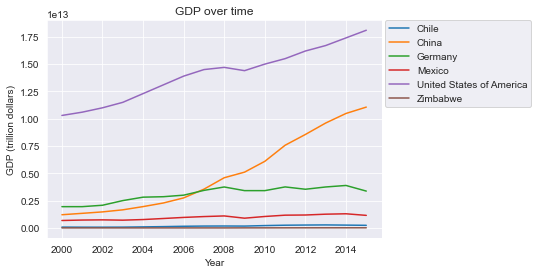

In [10]:
ax = sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
ax.set_ylabel('GDP (trillion dollars)')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('GDP over time')

It is evident that United States of America has the largest GDP of all the other nations as depicted on the previous diagram. The current visualization reveals new information such as the upward trends of GDP in U.S. and China, and the small rate of change in GDP in Germany through the years. The flat lines of Chile and Zimbabwe were expected because in the box plot graph the data points were not spread out along the x-axis. 

Nevertheless, the data in this diagram and the previous one share the same y-axis, meaning that details on data may be hidden. 
So, separate lineplots for each nation will be created using `Seaborn`'s `FacetGrid` class to examine the data in another perspective.

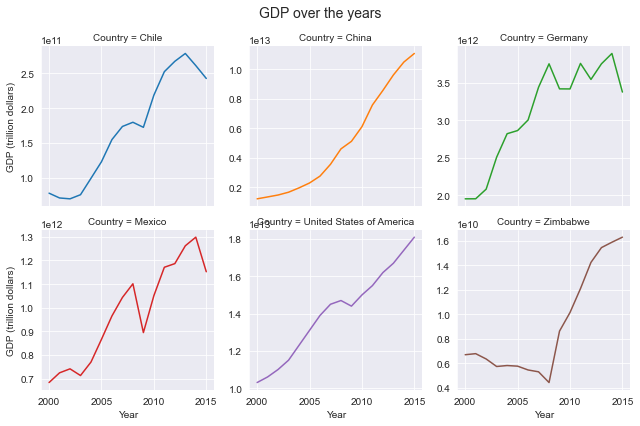

In [11]:
g = sns.FacetGrid(df, col='Country', hue='Country', col_wrap=3, sharey=False)
g.map(sns.lineplot,'Year','GDP')
g.set_ylabels('GDP (trillion dollars)')
g.fig.suptitle('GDP over the years', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 1])

This type of visualization reveals that GDP has increased not only in U.S. and China, but for all six nations over the years. Especially China has an exponential GDP increase. The other nations experienced a fall in GDP especially around 2008, which was the period of the Great Recession.  Also, in Germany GDP exhibits a fluctuation starting in 2007 till 2015.

## Average GDP
To have a sense of the data center concerning GDP, the following visualization is created.

Text(0.5, 1.0, 'Average GDP')

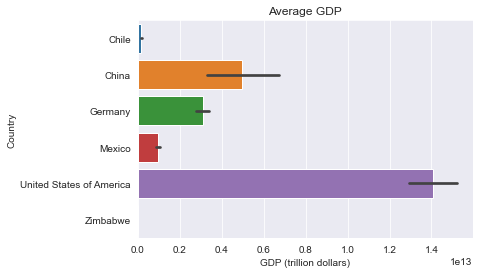

In [12]:
ax = sns.barplot(data=df, y='Country', x='GDP')
ax.set_xlabel('GDP (trillion dollars)')
ax.set_title('Average GDP')

## GDP and life expectancy 
The visualization below aims to reveal the relationship between GDP and life expectancy for the different countries of the `df`.

Text(0.5, 1.0, 'Life Expectancy vs GDP')

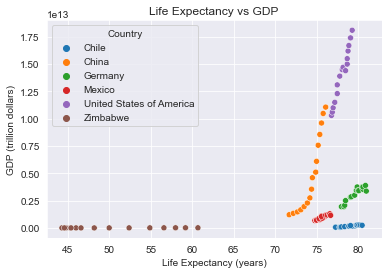

In [13]:
ax = sns.scatterplot(data=df, y='GDP', x='Life expectancy', hue='Country')
ax.set_ylabel('GDP (trillion dollars)')
ax.set_xlabel('Life Expectancy (years)')
ax.set_title('Life Expectancy vs GDP')

Seemingly, in Zimbabwe and Chile the life expectancy and GDP are not correlated since the data points form horizontal lines. In order to draw safe conclusions, it is best to plot the variables on individual axes for each country.

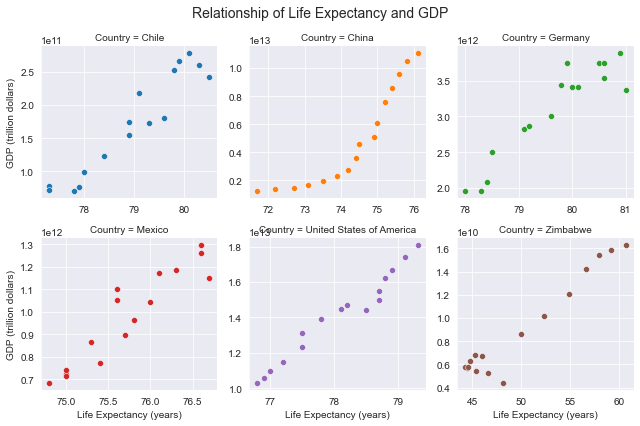

In [14]:
g = sns.FacetGrid(df, col='Country', hue='Country', col_wrap=3, sharey=False, sharex=False)
g.map(sns.scatterplot,'Life expectancy','GDP')
g.set_axis_labels('Life Expectancy (years)','GDP (trillion dollars)')
g.fig.suptitle('Relationship of Life Expectancy and GDP', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 1])

In general, it can be seen that each of the scatter plots in the chart above displays a positive correlation between life expectancy and GDP. The data points on the China plot form an exponential curve, whereas on the U.S. plot they form an almost straight line that indicates a strong positive correlation between the two variables.

## Conclusions
In this project, life expectancy and GDP data for six nations were analyzed in different ways by creating a variety of visualizations.
One by one the questions below were addressed:
- What is the distribution of that life expectancy?
    
    Life expectancy is distributed over 70 years for most of the countries. In Zimbabwe, the distribution was left-sided. This observation was attributed to the fact that this country has a low HDI.
    
    
- Has life expectancy increased over time in the six nations?
    
    Indeed life expectancy has increased over time in all six nations.
    
    
- What is the average life expectancy in these nations?
   
    The average life expectancy in these nations is generally between 70 to 80 years, except for Zimbabwe which rouhgly 50 years.
   
   
- Has GDP increased over time in the six nations?
    
    GDP has increased in all countries of the list. There was generally a time period around 2008 that GDP decreased for most of the countries, possibly because of the global financial crisis of that period. Only China seemed to be unaffected because its GDP was increasing exponentially.
    
    
- Is there a correlation between GDP and life expectancy of a country?
    
    GDP and life expectancy exhibited a positive correlation in all six nations.